# Homework: Data Distribution and Transformation

## Description
The exercises below are based on the `../data_raw/eda_health.csv` survey data.  The data is a subset of the 1991 General Social Survey in Canada, containing 6363 observations. The variables relevant to the exercises below are:

+ `HHINCOME`: The respondent's household income
+ `HAPPY`: A scale measuring happiness that ranges from 10 (unhappy) to 30 (extremely happy)
+ `SEX`
+ `CLASS`: The respondents social class (measured using a modification of the Goldthorpe class schema)


## Step-1: Import Relevant Packages/Modules

In [65]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import weightedstats as ws
from scipy.stats import norm
from sklearn import preprocessing

## Step-2: Get Familiar with the Data

+ Report summary statistics for the variables of interest
+ Provide comments on what you observed about these variables

In [4]:
eda_health = pd.read_csv('./eda_health.csv')
eda_health.head(3)

,Unnamed: 0,AGE,MARSTAT,CLASS,SEX,HHINCOME,RACE,RELIGION,HAPPY
0,1,30to64,SINGLE,Lower salariat,Men,6,white,1,21
1,2,30to64,MARRIED,Manual labour,Men,9,white,1,26
2,3,Under30,SINGLE,Lower salariat,Women,6,white,0,29


In [5]:
eda_health['HAPPY'].mean()

23.777306302058776

In [7]:
stats.trim_mean(eda_health['HAPPY'], proportiontocut = 0.1)

23.925162050677667

In [8]:
eda_health['HAPPY'].median()

24.0

While the values are all quite close to each other, the mean <= trimmed mean <= median. With a large enough dataset, this could result in a right skewed distribution for the continuous `HAPPY` variable

In [9]:
eda_health['HHINCOME'].mean()

6.851485148514851

In [12]:
stats.trim_mean(eda_health['HHINCOME'], proportiontocut = 0.1)

6.919858573954037

In [11]:
eda_health['HHINCOME'].median()

7.0

Once again we have the same distribution of values between the summary statistics for `HHINCOME`, however the trimmed mean and mean are closer to one another. That being said, this still points to a right skew in the data.

In [14]:
np.average(eda_health['HAPPY'], weights = eda_health['HAPPY'])

24.207151591262104

In [17]:
ws.weighted_median(eda_health['HAPPY'], weights = eda_health['HAPPY'])

24.0

Although very close, when adding weights, the weighted mean is only slightly greater than the weighted median.

In [21]:
eda_health.groupby('CLASS').sum()

,Unnamed: 0,HHINCOME,RELIGION,HAPPY
CLASS,,,,
Lower salariat,4787032,10595,239,35350
Manual labour,7907122,16262,359,59441
Routine nonmanual,3995498,8314,135,29479
Self employed,805140,1677,27,5793
Upper salariat,2752274,6748,141,21232


A break down of respondents by `CLASS`

## Step-3: Visual Exploration of `HAPPY`

+ Report and visualize summary statistics for `HAPPY`: central tendencity and variability, and the number of unique values.
+ Plot the following graphs on the same device: 
    * A histogram with density estimate for `HAPPY`. Make sure that the number of bins is much less than the number of unique values.
    * A density estimate that includes a normal reference band
    * Give each graph a title and make sure that they have the same values on the $y$-axis: `ylim=[0, 0.15]` and `xlim=[10, 30]`. 
+ What can you say about the distribution of `HAPPY`?


In [20]:
happy = eda_health['HAPPY']
happy.head(5)

0    21
1    26
2    29
3    19
4    27
Name: HAPPY, dtype: int64

In [22]:
print("Mean: ", happy.mean())
print("Median: ", happy.median())
print("Standard Deviation: ", happy.std())

Mean:  23.777306302058776
Median:  24.0
Standard Deviation:  3.1972127870182017


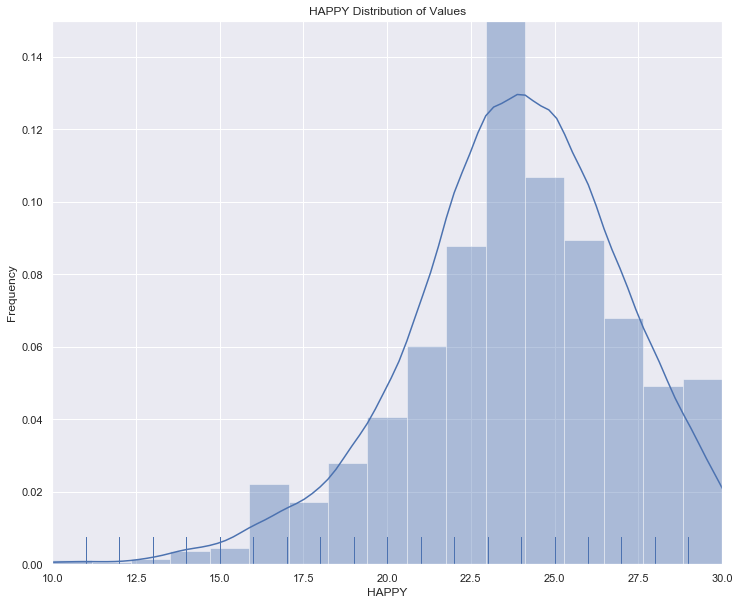

In [30]:
sns.set(rc = {'figure.figsize': (12, 10)})
ax = sns.distplot(happy, bins = 17, kde = True, rug = True)
ax.set(title = "HAPPY Distribution of Values", 
       xlabel = "HAPPY", 
       ylabel = "Frequency", 
       ylim = [0, 0.15], 
       xlim = [10, 30])
plt.show()

In [40]:
print("Number of unique values in HAPPY: ", len(happy.unique()))

Number of unique values in HAPPY:  21


As previously anticipated, the data is skewed to the right, ever so slightly.

## Step-4: Explore Normality for `HAPPY`

+ Construct a boxplot
+ Construct a quantile-comparison for `HAPPY` 
+ Construct side-by-side boxplots for `HAPPY` for men and women separately 
+ Describe the distribution based on these graphs
+ Do you see anything new that you didn't notice in the histogram?

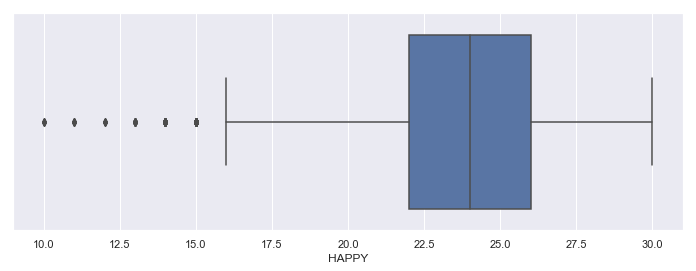

In [34]:
sns.set(rc = {'figure.figsize': (12, 4)})
sns.boxplot(x = happy)

In [37]:
happy.quantile([0.25, 0.5, 0.75])

0.25    22.0
0.50    24.0
0.75    26.0
Name: HAPPY, dtype: float64

In [43]:
happy_gender = eda_health.loc[:, ['SEX', 'HAPPY']]
happy_gender.head(3)

,SEX,HAPPY
0,Men,21
1,Men,26
2,Women,29


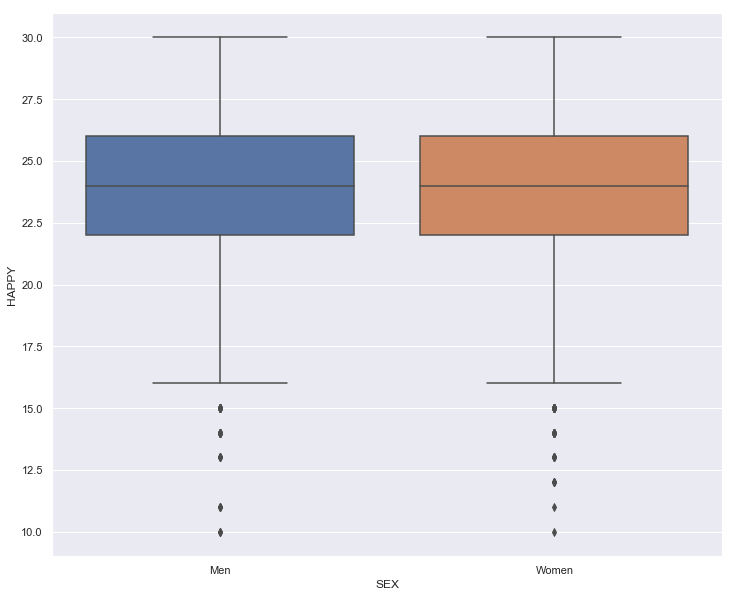

In [46]:
sns.set(rc = {'figure.figsize': (12, 10)})
sns.boxplot(y = happy_gender['HAPPY'], x = happy_gender['SEX'])

Both boxplots, while pointing out outliers, still show right-skewedness, and add nothing other than outlier values, to our knowledge based off of the histograms.

## Step-5: Scatter Plots: `HAPPY` vs. `HHINCOME`

+ Construct two scatterplots of `HHINCOME (x)` and `HAPPY (y)`, placing them side-by-side.
    * Plot the original data 
    * Try to jitter both `HHINCOME` and `HAPPY`. 
    * Give sensible labels to the $x$ and $y$ axes, and give each of the graphs a title. 
+ Is there any noticeable pattern between the two variables? 
+ What does jittering do for us here?


In [47]:
happy_income = eda_health.loc[:, ['HHINCOME', 'HAPPY']]
happy_income.head(5)

,HHINCOME,HAPPY
0,6,21
1,9,26
2,6,29
3,3,19
4,8,27


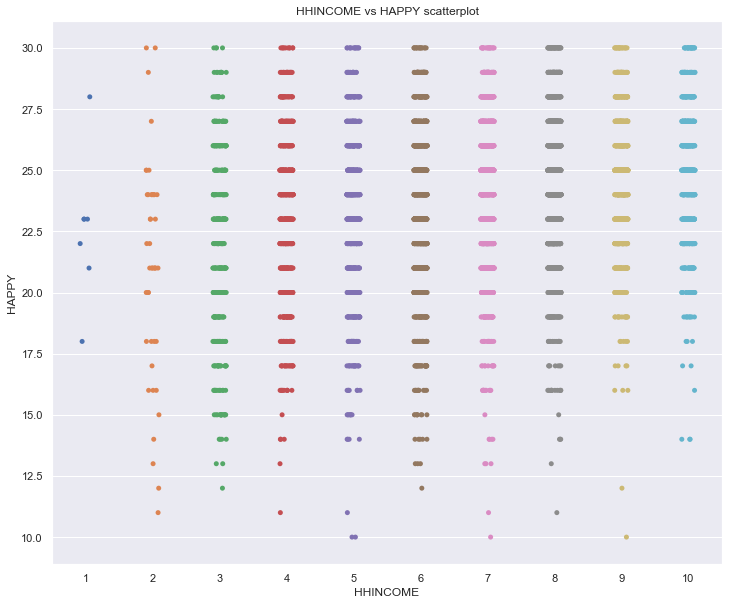

In [51]:
plot = sns.stripplot(x = 'HHINCOME', y = 'HAPPY', data = happy_income)
plot.set(title = "HHINCOME vs HAPPY scatterplot")
plt.show()

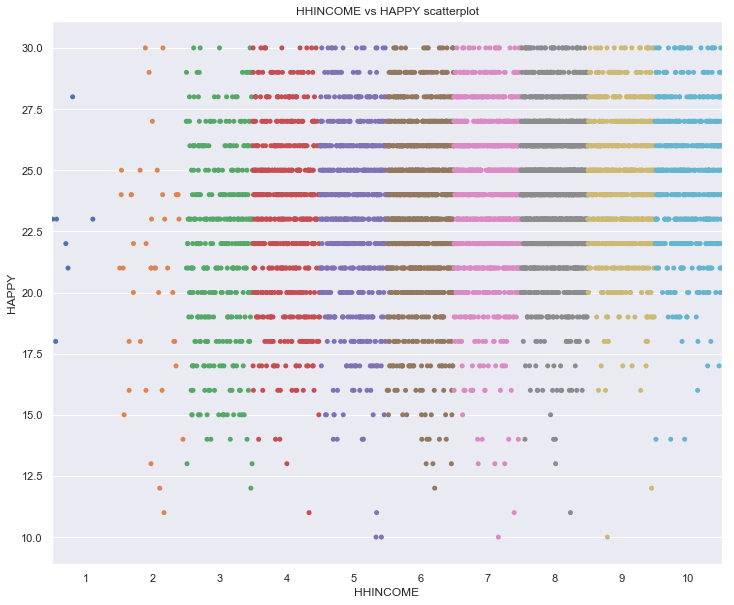

In [52]:
plot = sns.stripplot(x = 'HHINCOME', y = 'HAPPY', data = happy_income, jitter = 0.5)
plot.set(title = "HHINCOME vs HAPPY scatterplot")
plt.show()

Jittering allows us to better see the number of points per `HHINCOME` value. Since this dataset is so dense, many of the points overlap. Jittering allows us to minimize the overlap and get a better view of the data in this case.

## Step-6: Conditional Scatterplot

+ Plot and explore the relationship between `HAPPY` and `HHINCOME`, conditional on `CLASS`
+ Discuss your findings.

In [53]:
df = eda_health.loc[:, ['HHINCOME', 'HAPPY', 'CLASS']]
df.head(5)

,HHINCOME,HAPPY,CLASS
0,6,21,Lower salariat
1,9,26,Manual labour
2,6,29,Lower salariat
3,3,19,Manual labour
4,8,27,Upper salariat


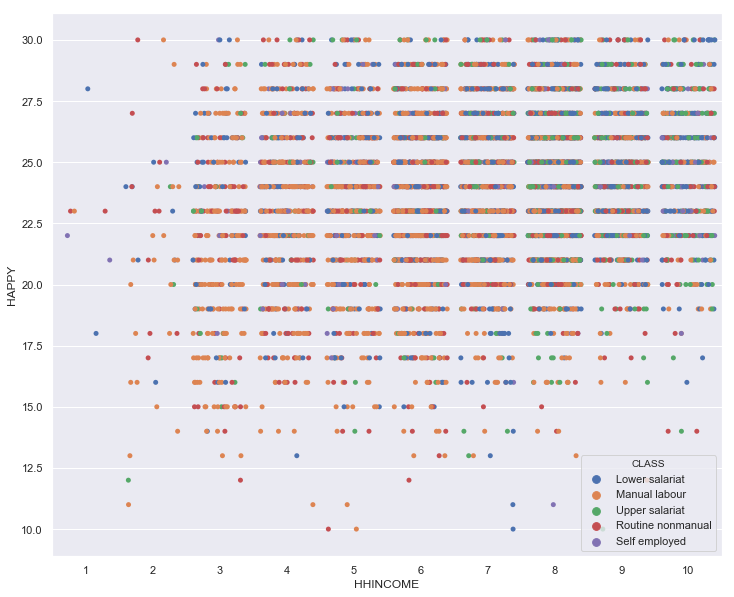

In [57]:
sns.stripplot(x = 'HHINCOME', y = 'HAPPY', hue = 'CLASS', jitter = 0.4, data = df)

The spread of the different responses based upon `CLASS` is pretty uniformly spread out throughout the scatterplot. There are no immediate findings.

## Step-7: Transformations

+ Using power transformations (justify the choice of powers tested), attempt to make the distribution of `HAPPY` more normal. 
+ Plot the original distribution and the final transformed distribution in quantile-comparison plots. 
+ Justify your final transformation.

In [70]:
happy = pd.DataFrame(eda_health['HAPPY'])
min_max_scaler = preprocessing.MinMaxScaler()
happy_norm_data = min_max_scaler.fit_transform(happy)
happy_norm = pd.DataFrame(happy_norm_data)
happy_norm.head(5)

,0
0,0.55
1,0.80
2,0.95
3,0.45
4,0.85


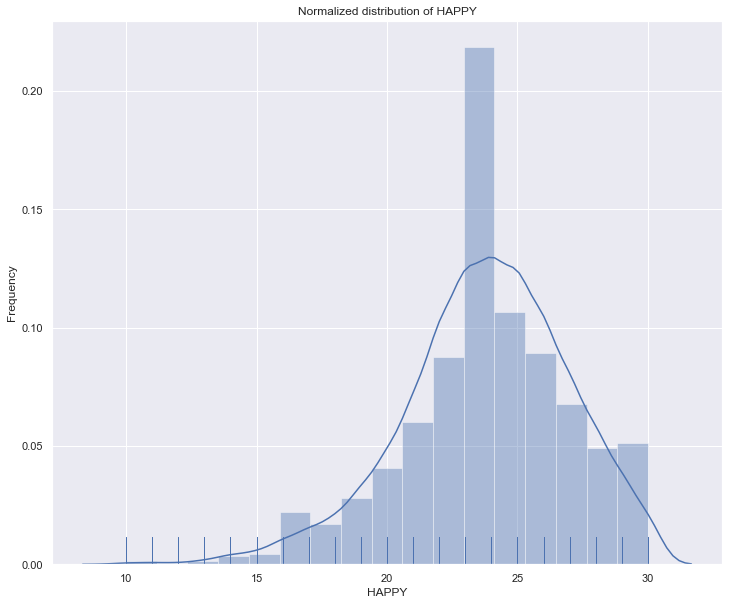

In [75]:
ax = sns.distplot(happy, bins = 17, kde = True, rug = True)
ax.set(title = "Normalized distribution of HAPPY", xlabel = "HAPPY", ylabel = "Frequency")
plt.show()